In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("student_synthetic.csv")


In [14]:
print(df.head())

  student_id                name class  comprehension  attention  focus  \
0       S001  Sahil Bhattacharya     B          48.93      43.75  38.65   
1       S002            Neha Lal     B          85.26      80.38  63.79   
2       S003        Krishna Bose     A          48.38      52.27  42.97   
3       S004      Sahil Malhotra     B          78.74      73.12  68.58   
4       S005        Ritika Gupta     A          72.24      68.54  56.29   

   retention  engagement_time  assessment_score  
0      46.13               91             50.70  
1      86.14              102             85.14  
2      45.43               93             49.97  
3      69.74              104             73.56  
4      56.91              120             64.20  


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        200 non-null    object 
 1   name              200 non-null    object 
 2   class             200 non-null    object 
 3   comprehension     200 non-null    float64
 4   attention         200 non-null    float64
 5   focus             200 non-null    float64
 6   retention         200 non-null    float64
 7   engagement_time   200 non-null    int64  
 8   assessment_score  200 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 14.2+ KB
None


In [18]:
print(df.describe())

       comprehension   attention      focus   retention  engagement_time  \
count     200.000000  200.000000  200.00000  200.000000       200.000000   
mean       71.103100   67.462650   64.30085   64.714100        87.310000   
std        13.247475   12.475128   13.25419   10.887993        20.380647   
min        31.600000   34.190000   30.84000   35.860000        30.000000   
25%        62.405000   58.482500   55.49000   58.155000        73.000000   
50%        72.030000   67.345000   64.08500   64.455000        88.500000   
75%        78.895000   75.892500   73.12500   71.357500       101.000000   
max       100.000000   98.200000   99.35000   90.300000       148.000000   

       assessment_score  
count        200.000000  
mean          66.753150  
std           11.653772  
min           37.560000  
25%           58.467500  
50%           65.775000  
75%           75.340000  
max           95.080000  


In [24]:
numeric_df = df.select_dtypes(include=['number'])

In [26]:
corr = numeric_df.corr()

In [28]:
print(corr["assessment_score"].sort_values(ascending=False))

assessment_score    1.000000
attention           0.842997
comprehension       0.814606
retention           0.774262
focus               0.728507
engagement_time     0.289902
Name: assessment_score, dtype: float64


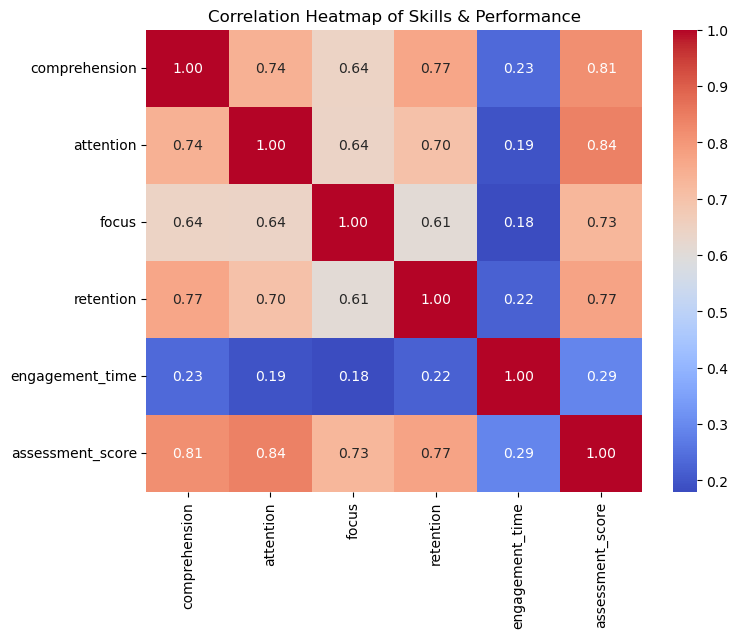

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Skills & Performance")
plt.show()


In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[["comprehension","attention","focus","retention","engagement_time"]]


In [36]:
y = df["assessment_score"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [64]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Linear Regression performance
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Random Forest performance
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

metrics = {
    "Linear Regression": {"R2": round(r2_lr,3), "RMSE": round(rmse_lr,3)},
    "Random Forest": {"R2": round(r2_rf,3), "RMSE": round(rmse_rf,3)}
}

print(metrics)


{'Linear Regression': {'R2': 0.877, 'RMSE': 4.437}, 'Random Forest': {'R2': 0.844, 'RMSE': 5.009}}


           Feature  Coefficient
1        attention     0.349160
3        retention     0.245315
0    comprehension     0.219203
2            focus     0.169927
4  engagement_time     0.039249


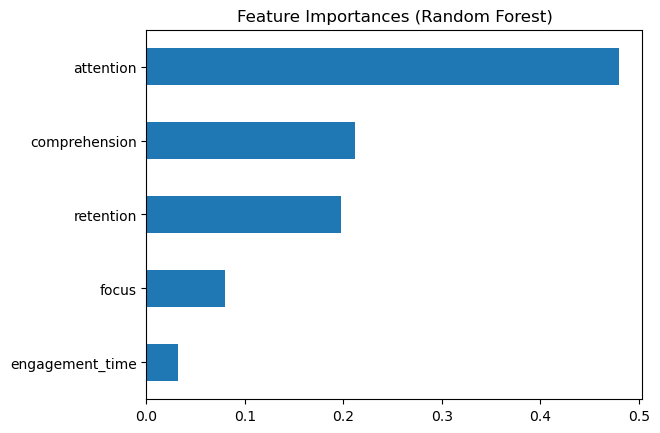

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coef_df)


importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importances (Random Forest)")
plt.show()


In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select only cognitive skills + engagement
features = df[["comprehension","attention","focus","retention","engagement_time"]]

# Scale features
scaler = StandardScaler()
scaled = scaler.fit_transform(features)


In [50]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["persona"] = kmeans.fit_predict(scaled)

# Persona profile (average scores)
persona_profiles = df.groupby("persona")[["comprehension","attention","focus","retention","engagement_time","assessment_score"]].mean()
print(persona_profiles)


         comprehension  attention      focus  retention  engagement_time  \
persona                                                                    
0            71.997340  68.561277  65.353191  65.130426        87.117021   
1            87.033750  81.728958  77.983750  77.413542        96.687500   
2            56.469828  53.875517  51.271552  53.529483        79.862069   

         assessment_score  
persona                    
0               67.451489  
1               80.521458  
2               54.226897  


C:\Users\deeks\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


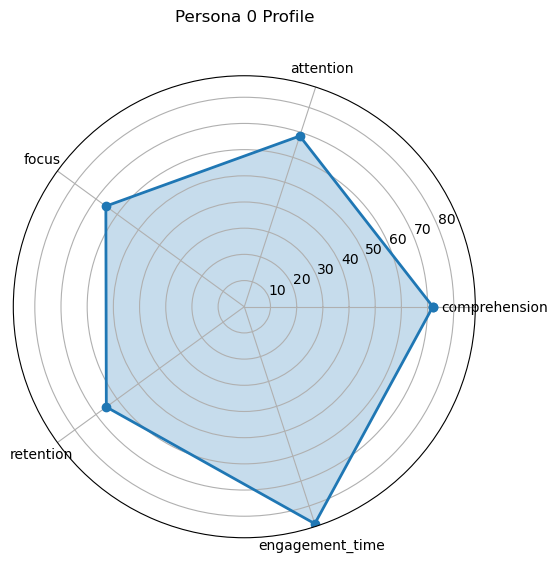

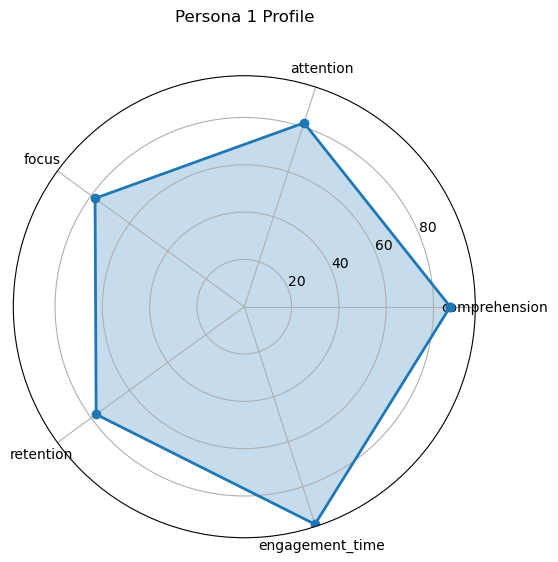

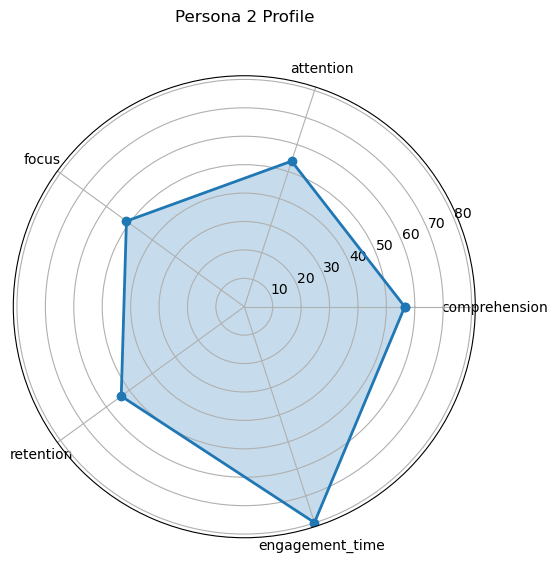

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def make_radar_chart(data, labels, title):
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    data = np.concatenate((data,[data[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, data, "o-", linewidth=2)
    ax.fill(angles, data, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, y=1.1)
    plt.show()

# Labels
labels = ["comprehension","attention","focus","retention","engagement_time"]

# Plot radar for each persona
for i, row in persona_profiles[labels].iterrows():
    make_radar_chart(row.values, labels, f"Persona {i} Profile")




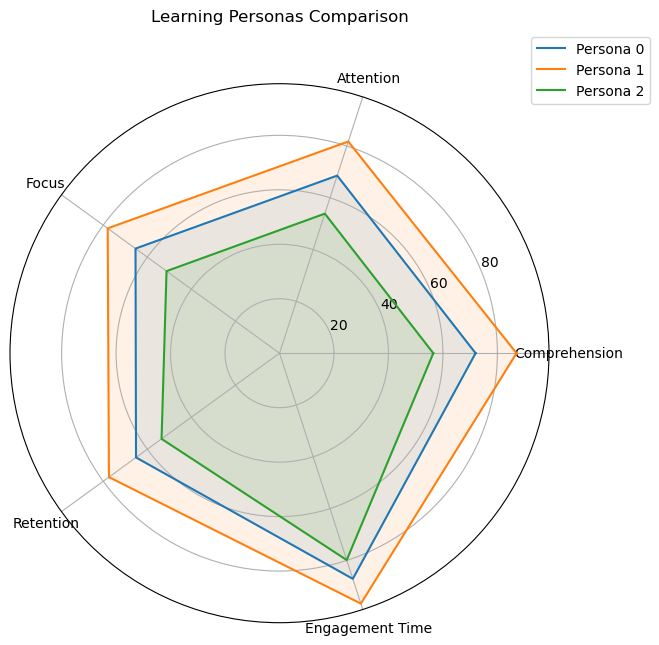

In [60]:
labels = ["comprehension","attention","focus","retention","engagement_time"]
pretty_labels = ["Comprehension","Attention","Focus","Retention","Engagement Time"]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

# Plot each persona
for i, row in persona_profiles[labels].iterrows():
    data = row.values.tolist()
    data += data[:1]  # close the loop
    ax.plot(angles, data, label=f"Persona {i}")
    ax.fill(angles, data, alpha=0.1)

# Style
ax.set_thetagrids(np.degrees(angles[:-1]), pretty_labels)
ax.set_title("Learning Personas Comparison", y=1.1)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.show()


In [66]:
df.to_json("students_with_persona.json", orient="records")
persona_profiles.to_json("persona_profiles.json", orient="index")
with open("metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)
